# Chapter 5: Integrals and Derivatives (Part 2)

**Please work through this notebook and complete a few exercises distributed throughout. It demonstrates some of the topics we have been exploring with numerical integration and touches on some topics that are good to be aware of.**

In physics classes we often solve problems using integrals that can be solved analytically. In reality, there are many applications of physics involving integrals that can not be solved in analytical form. In many cases the integrals can only be solved numerically. In other cases, it may simply be convenient to solve numerically.

In this Chapter we explore some methods to solve different types of integrals, estimate cause of uncertainties in the estimated integrals and the size of those uncertainties. 

### 1. Exercise (Based on Newman Exercise 5.3)
One of the problems in Newman's Computational Physics textbook asks to compute $e^{-t^{2}}$. This is an example of a function that cannot be computed analytically. Doing it numerically is the only way to solve this!

Look through the following code. Which integration method is implemented? (Add your anwser here.)

**Anwswer:** Integration method = _______Trapezoid________

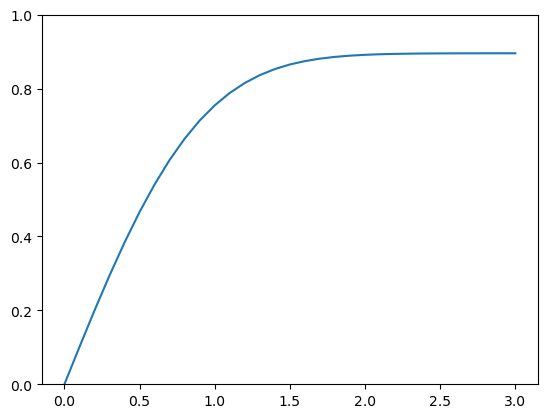

In [3]:
from math import exp
from numpy import linspace,abs
from pylab import plot,ylim,show

xmin = 0.0
xmax = 3.0
steps = 30
deltax = (xmax-xmin)/steps
N=100
h = deltax/N

def f(t):
    return exp(-t*t)

E = 0.0
xpoints = linspace (xmin, xmax, steps+1)
ypoints = []
for x in xpoints:
    ypoints.append(E)
    E += 0.5*h*(f(x)+f(x+N*h)) #I think this is trapezoid method here
    for k in range(N):
        E += h*f(x+k*h)

plot(xpoints, ypoints)
ylim(0.0, 1.0)
show( )

This is the Gaussian Error Function. As the book notes there is no way to solve this integral analytically. It must be done numerically by using these types of methods. The method can be chosen depending on the required speed, accuracy and an understanding of the accuracy of the different methods for that case.

# Errors on Integrals

Newman's textbook outlines, in Section 5.2, methods to determine the uncertainty in our estimated integrals. With a generic Taylor expansion of the integrand, f(x), around points $x_{k-1}$ and $x_{k}$, and with some algebra, we arrive at an expression for the error when we use the Trapezoidal method. This is given by Eq. 5.20,
$$
\epsilon = \frac{1}{12}h^{2} \left[ f^{'}\left( a\right) - f^{'}\left( b\right) \right]
$$
which is called the Euler-Maclaurin formula for the error on the Trapezoidal rule. It is proportional to $h^{2}$. We have neglected higher order terms so this is only an **estimate** of the error. However, if we choose small widths, $h$, for our trapezoids terms like $h^{4}$, $h^{6}$, etc. should be much, much smaller.

Because the error depends on $h^{2}$, we call it a *first-order* integration rule. It is only accurate up and including terms proportional to h.

### Example
The following code computes this error estimate for the function $x^{4} - 2x + 1$.

In [2]:
def f_prime(x):
    return 4*x**3 - 2

N=10**1
a = 0.0
b = 2.0
h = (b-a)/N
epsilon = (h**2)*(f_prime(a) - f_prime(b))/12.

print("epsilon = ",abs(epsilon))
    

epsilon =  0.10666666666666669


For many values of N this approximation error is more significant than rounding error due to machine precision. However, when N, and therefore the width, h, of our trapezoids is extremely small it reaches a limit where rounding error does become important. This happens around $\sqrt{10^{-16}}$ which turns out to be $10^{-8}$. 

**Compare** this to your graph of $log(error)$ vs $log(N)$ from last time. What happened in your graph of fractional errors around $log(error)=10^{-8}$ for the trapezoidal rule?

$\color{green}{\text{That's as far as it can go}}$

Note that there is no reason to use narrower intervals beyond this point. The accuracy won't improve. A different method would be required to get a more accurate estimate of the integral.

For Simpson's method, the error estimate is
$$
\epsilon = \frac{1}{180}h^{4} \left[ f^{'''}\left( a\right) - f^{'''}\left( b\right) \right]
$$
This is a *third-order* integration rule (error is proportional to $h^{4}$). Notice in your graph of fractional errors that for Simpson's method, the maximum accuracy possible is obtained around $N=10^{4}$ intervals. We achieve the same accuracy with many fewere steps.

We can estimate this error from our calculations themselves.


**Practical Estimate of Error**

If we know the analytical function $f(x)$ the formula derived above provide estimates of the error. In many cases we will not know the exact function. It may be the output of another calculation or it may be constructed from measurements (an example, the speed of an object measured at different times). There is another way to estimate the error. It involves using the same numerical integration method two times with $N$ and then $N/2$ steps.

Consider the trapezoidal. The expression for the error tells us that the error on our approximation of the true value is proportional to $h^{2}$. That is, the error is of order $O(h^{2})$. First, compute the integral, $I_{1}$, with the trapezoidal method using intervals of width $h_{1}=(b-a)/N)$. This has error, $O(h_{1}^{2})$, which we can write as a proportionality constant, c, times $h_{1}^{2}$, or $ch_{1}^{2}$. Second, double the number of intervals, $h_{2} = (b-a)/(2N) = h_{1}/2$. This has error $O(h_{2}^{2})$, which can be write as $ch_{2}^{2} = ch_{1}^{2}/4$. This means our error for N intervals is 4 times the error for 2N intervals (for the trapezoidal method). Equate the numerical integrals plus their approximate errors:
$$
I_{1} + 4ch_{2} = I_{2} + ch_{2}.
$$
Solving for the uncertainty, $ch^{2}$, we find that
$$
\epsilon_{2} = ch_{2}^{2} = \frac{1}{3} \left( I_{2} - I_{1} \right).
$$
That is, we can estimate the error, when integrating with the trapezoidal rule, by repeating the calculation with half the intervals and dividing by three!. (The same procedure for Simpson's rule gives $\epsilon_{2} = \frac{1}{15} \left( I_{2} - I_{1} \right)$.

**2. Exercise:** Use your code (or the code from above) for the trapezoidal rule to integrate the same function $x^{4} - 2x + 1$. Compute the integral with $N=10$ and $N=20$ intervals. What is your estimate of the error?
#### ANSWER

$\color{green}{\text{N = 10, 0.10666666666666669}}$

$\color{green}{\text{N = 20, 0.026666666666666672}}$

**3. Exercise:** What is the difference between the exact value, 4.4, and the integral using the trapezoidal method with N=20 intervals? Is it close to last two estimates? 
#### ANSWER

$\color{green}{\text{0.02666 less than with N=10}}$

**4. Exercise:** Compute the error from a few cells above using the derivatives, $\epsilon=\frac{1}{12}[f^{'}(a)-f^{'}(b)]$,  with N=20 intervals. How does this compare to your estimate in the previous question?  
#### ANSWER


**NOTE:** Both ways of estimating give similar errors usually. The second way requires two numerical integrations but can work in situations where we don't know the equation for the derivatives


In [3]:
N=20
a = 0.0
b = 2.0
h = (b-a)/N
epsilon = (h**2)*(f_prime(a) - f_prime(b))/12.

print("epsilon = ",abs(epsilon))
    

epsilon =  0.026666666666666672


### Choosing the number of steps

Often we only need an integral to a certain accuracy. Perhaps a calculation involves experimental values that have an accuracy of $0.00001$ which limits the number of significant figures in our calculation. We probably do not need to invest  effort getting an integral more accurate than that. Let us determine the best number of steps to use. 

We see that doubling the number of steps gives an estimate of the error. For the trapezoidal method $\epsilon_{2} = {{1} \over {3}} (I_{2} - I_{1})$. If we double again, $\epsilon_{3} = {{1} \over {3}} (I_{3} - I_{2})$. Here, $I_{3}$ is computed with $N_{3}=2N_{2}=4N_{1}$ steps. We can repeat this process until
$$
\epsilon_{i} = {{1} \over {3}} \left( I_{i} - I_{i-1} \right)
$$
is below our desired accuracy.

It turns out that, by doubling the number of steps N each time, we already have calculated half the values in $I_{i}$. $I_{i}$ includes all the points in I_{i-1}. We must only calculate the new points using Eq. 5.34,
$$
I_{i} = {{1} \over {2}}I_{i-1} + h_{i} \sum_{k odd=1...N_{i}-1} f(a+kh_i)
$$

To calculate the integral $I_{i}$ we reuse the value $I_{i-1}$ but with a weight of ${{1} \over {2}}$ now. Each time we double $N_{i}$ and compute $\epsilon_{i}$ all we have to do is the second sum in the last equation. When $\epsilon_{i}$ reaches our desired accuracy, we stop. The integral $I_{i}$ is already computed and we are done.

What are the advantages of this *adaptive integration* approach? We save time and processing effort. We get our result more efficiently. With almost no extra effort, we obtain the integral value, plus an estimate of the approximation error. And, our desired accuracy is guaranteed. 

A similar procedure is derived for Simpson's method in the textbook, Section 5.3.

##### There are more advanced integration methods that can achieve extreme accuracy (in some cases). They require more effort up front, however. They have advantages in some ways but also disadvantages in others. Here, I will just describe them in general, based upon what we have explored above. See the text for more details.

### Romberg Integration
The derivation and description is in Newman Section 5.4. Through an iterative process that is similar to the *adaptive integral* method just outlined, it is possible to obtain much more accurate results, more quickly. It also provides an error estimate at each step so we can stop as soon as our integral value has our desired accuracy. 

This method is good for smooth, well behaved integrands, $f(x)$. If there are pathologies like rapid fluctuations, singularities or noisy values in $f(x)$, then a simpler adaptive method (like the adaptive trapezoidal method from the previous sections is a better choice.

### Higher-order Integration Methods

In the example above, we explored an *adaptive integration* method based on the trapezoidal rule. Simpson's rule used a quadratic equation to approximate the functions. We could develop similar methods using cubic, quartic, etc. equations. 

From the simple example with trapezoidal rule, we note that it relied on evenly spaced intervals $x_{i-1}=a+(i-1)h$ to $x_{i}=a+ih$. These examples are easy to program using for loops. 

If we instead choose unevenly spaced "sample points," $x_{k}$, and use higher order polynomials, both accuracy speed of the numerical integral calculation may be increased. Doing this leads to an excellent integration method called *Gaussian quadrature.* These are more difficult to code by hand, but we can import implementations from Python packages.

Note the subscript on p. 168 of the textbook. These methods are actually very old. Long ago, numerical derivatives were computed by hand. (Remember there are many functions that cannot be integrated analytically.) This is why finding extremely efficient ways to perform the integrals in as few steps as possible were developed.

The derivation of Gaussian quadrature method is given in the book. We will compare the efficiency of this method to the earlier methods below.


**5. Exercise:** To investigate the efficiency of the Gaussian quadrature integration method we will integrate the same function as the earlier method? 
1. **(I just pasted it in the next cell.)** Download the file gaussxw from the Newman textbook website or Blueline. Make sure it is in the same directory as this Notebook.
2. **(I add this code two cells down.)** The following code is from Example 5.2 in Newman, the gaussxw code. Use N=3 "sample points". This is **significantly** less than for the trapezoidal method or Simpson's method.
3. Answer the questions below.

In [5]:
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [6]:
# Newman Example 5.2: Gaussian integral of a simple function

def f(x):
    return x**4 - 2*x + 1

N = 3
a = 0.0
b = 2.0

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

4.4000000000000075


**6. Exercise:** What is the value of the integral using Gaussian quadrature with $N=3$? How does this compare to the trapezoidal method or Simpson's method with $N=10^{8}$?
#### ANSWER

$\color{green}{\text{they are quite the same but simpson's method takes longer to process}}$

This may seem like magic. If you're interested in how this is possible, follow through the textbook derivation (Landau or Newman). It may be worth following the derivations for trapezoidal method, Simpson's method, adaptive integragion, Romberg integration and higher-order methods and then Gaussian quadrature. Understanding the simpler cases first, you will see how the more complex cases use some very similar steps. 

#### Errors on Gaussian Quadrature
With Gaussian quadrature, estimating the approximation error is not quite as straightforward as the simpler methods but there are techniques described in Section 5.6.3.

#### Choosing an integration method
We have seen a number of methods some very simple to implement others more complex but extremely accurate and efficient. Section 5.7 gives some guidelines for choosing which is best. There is no absolute answer for which is best to use. It is important to be aware of these factors. 

In general, the more complex methods work best for rather smooth, well-behaved functions. If the integrand has pathologies such as singularities, rapid variations, is composed of noisy data then the simple trapezoidal method may turn out to be the best choice.

### Integration Over Infinite Ranges
Integrating over an infinite range with our techniques would require an infinite number of intervals or "sample points." We can use a trick. We may use a change of variables, substituting
$$
z = \frac{x}{1+x} \quad \text{or} \quad x = \frac{z}{1-z}
$$
Then $dx = dz/(1-z)^{2}$ and we can transform the integral:
$$
\int_{0}^{\infty} f(x) \ dx = \int_{0}^{1} \frac{1}{(1-z)^{2}} f \left( \frac{z}{1-z} \right) \ dz.
$$
This is a good transformation to begin with. It doesn't always work but there are other similar options to try as discussed in Section 5.8.

**Exercise:** In the following cell, run the code from Example 5.3 in the Newman textbook (or from the textbook website in the file intinf.py). Compare the accuracy of this implementation of Gaussian quadratures to the function
$$
\int_{0}^{\infty} \exp^{-t^{2}} \ dt = \int_{0}^{\infty} \frac{\exp^{-z^{2}/(1-z)^{2}}}{(1-z)^{2}} \ dt
$$
We integrated this over a finite range before. Here we do an infinite range so we must transform the integrand. Notice that this transformation changes the limits from an infinite range $(0,\infty)$ to a finite range $(0,1)$. Really, after this transformation, we can use any of the techniques discussed so far. How does the accuracy sompare to the exact value $\sqrt{\pi}/2 = 0.886226925453$?
#### ANSWER

$\color{green}{\text{is basically the same value!}}$

In [7]:
# Enter the code from Example 5.2 or intinf.py here
from math import exp

def f(z):
    return exp(-z**2/(1-z)**2)/(1-z)**2

N = 50
a = 0.0
b = 1.0
x,w = gaussxwab(N,a,b)
s = 0.0
for k in range(N):
    s += w[k]*f(x[k])

print(s)

0.8862269254528349
